## HW9: Geopandas
This notebook is designed to pratice with both geopandas and census data.  This is a simple spatial exploratory analysis of census data. The goal is to assess wheather the location of the [linkNYC](https://www.link.nyc/) access points is optimal to guarantee a more "democratic" access to the internet.

In [1]:
import urllib
import requests
import json
import io
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import pylab as pl
import os
import shapely
from fiona.crs import from_epsg
from geopandas import GeoDataFrame
import geopandas as gp
from shapely.geometry import Point

%matplotlib inline

## 1. PUMA : Public Use Microdata Area


### 1.1 download the NYC  Public Use Microdata Areas (PUMA) geometry fron the NYC Open Data API and read it in with geopandas

In [2]:
# reading in data from url for reproducability
!wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nypuma_17d.zip 

# unpack the data into PUIdata dircetory
cmd = "mv nypuma_17d.zip " + os.getenv("PUIDATA")

#let's see it
print (cmd)

--2017-12-19 19:37:33--  http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nypuma_17d.zip
Resolving www1.nyc.gov... 104.106.240.221, 2600:141b:13:297::1500, 2600:141b:13:292::1500
Connecting to www1.nyc.gov|104.106.240.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 761605 (744K) [application/zip]
Saving to: “nypuma_17d.zip”

100%[======================================>] 761,605     --.-K/s   in 0.03s   

2017-12-19 19:37:33 (21.1 MB/s) - “nypuma_17d.zip” saved [761605/761605]

mv nypuma_17d.zip /home/cusp/vmr286/PUIdata


In [3]:
# move 
os.system(cmd)

0

In [4]:
# read in with goepandas
!unzip -d $PUIDATA nypuma_17d.zip
!ls $PUIDATA

unzip:  cannot find or open nypuma_17d.zip, nypuma_17d.zip.zip or nypuma_17d.zip.ZIP.
201401-citibike-tripdata.csv
201401-citibike-tripdata.zip
201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
201502-citibike-tripdata.csv
201502-citibike-tripdata.zip
201503-citibike-tripdata.csv
201503-citibike-tripdata.zip
201504-citibike-tripdata.csv
201504-citibike-tripdata.zip
201505-citibike-tripdata.csv
201505-citibike-tripdata.zip
201506-citibike-tripdata.csv
201506-citibike-tripdata.zip
201507-citibike-tripdata.csv
201507-citibike-tripdata.zip
201508-citibike-tripdata.csv
201508-citibike-tripdata.zip
201601-citibike-tripdata.csv
201601-citibike-tripdata.zip
201602-citibike-tripdata.csv
201602-citibike-tripdata.zip
201603-citibike-tripdata.csv
201603-citibike-tripdata.zip
201604-citibike-tripdata.csv
201604-citibike-tripdata.zip
201606-citibike-tripdata.csv
201606-citibike-tripdata.zip
201607-citibike-tripdata.csv
201607-citibike-tripdata.zip
201608-citibike-tripdata.csv
201608-citibike

In [5]:
!ls $PUIDATA

201401-citibike-tripdata.csv
201401-citibike-tripdata.zip
201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
201502-citibike-tripdata.csv
201502-citibike-tripdata.zip
201503-citibike-tripdata.csv
201503-citibike-tripdata.zip
201504-citibike-tripdata.csv
201504-citibike-tripdata.zip
201505-citibike-tripdata.csv
201505-citibike-tripdata.zip
201506-citibike-tripdata.csv
201506-citibike-tripdata.zip
201507-citibike-tripdata.csv
201507-citibike-tripdata.zip
201508-citibike-tripdata.csv
201508-citibike-tripdata.zip
201601-citibike-tripdata.csv
201601-citibike-tripdata.zip
201602-citibike-tripdata.csv
201602-citibike-tripdata.zip
201603-citibike-tripdata.csv
201603-citibike-tripdata.zip
201604-citibike-tripdata.csv
201604-citibike-tripdata.zip
201606-citibike-tripdata.csv
201606-citibike-tripdata.zip
201607-citibike-tripdata.csv
201607-citibike-tripdata.zip
201608-citibike-tripdata.csv
201608-citibike-tripdata.zip
201610-citibike-tripdata.csv
201610-citibike-tripdata.zip
201612-citibik

In [6]:
filename = os.getenv('PUIDATA') + '/PUMA'

cens_key = open(os.getenv('PUIDATA')+'/census_key.txt', 'r+')
myAPI = cens_key.readlines()[0]


In [7]:
pumashp = gp.read_file(filename)
pumashp.head()

,shape_area,shape_leng,puma,geometry
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...


In [8]:
pumashp.crs

{'init': u'epsg:4326'}

### 1.2  plot the PUMA NYC regions

you can use the geopandas function plot. 
What is the appropriate plot to just show the shape of the PUMA regions? A choropleth could be ok, but it is better to just draw the contours of the region, since we do not want to highlight some regions over others by color choices. 

(Note: a while ago I wrote a quick function that plots choropleths and maps of NYC specifically putting legends and colorbars in the empty spaces taking advantage of the shape of the city and you are welcome to use it: https://github.com/fedhere/choroplethNYC. BUT YOU DO NOT HAVE TO)



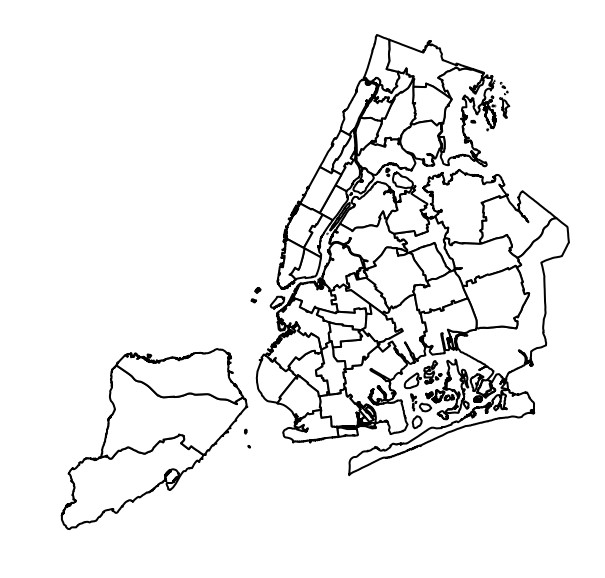

In [9]:
# reading in using @fedhere function for choropleth
import choroplethNYC as cp
cp.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

**Figure 1:** This shows the PUMA regions for the five boroughs of NYC. 

___

## 2. American Fact Finder data on percentage of houses with broadband internet access

Download the table of data from 2016 for NYC: you want to obtain data on broadband access (percentage of households with broadband access) at the PUMA (Public Use Microdata Area) geographical area level. 

### 2.1 Get data with American Fact Finder (AFF) API: 

In [10]:
# with open('censusAPI.txt', 'r') as f:
#     myAPI = f.readline()

In [11]:
#read in in the variables available. the info you need is in the 1year ACS data
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [12]:
#turning things into arrays to enable broadcasting
#Python3
# affkeys = np.array(list(aff1y['variables'].keys()))
# Python2
affkeys = np.array(aff1y['variables'].keys())

In [13]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[(u'B28002_008E',
  u'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 (u'B28002_004E',
  u'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 (u'B28002_007E',
  u'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL')]

chose the appropriate variable and extract the relevant data: below I select the variable containing the number of household per PUMA. The "all" variable, which tells you what is the total number of units queried (households here) is generally stored in the \_001 variable (B28002_001 in this case). "E" stands for *estimate*. M stands for *margin of error*, EA *estimate annotations*, MA *margin of error annotations*. You want the estimate for this exercise. 

In [14]:
#keyword for the number of households
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{u'attributes': u'B28002_001M,B28002_001EA',
 u'concept': u'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 u'group': u'B28002',
 u'label': u'Estimate!!Total',
 u'limit': 0,
 u'predicateType': u'int',
 u'validValues': []}

Similarly, choose the fractions of houses with any "With an Internet subscription!!Broadband of any type"

In [15]:
#keyword for the number of households with broadband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{u'attributes': u'B28002_004M,B28002_004EA',
 u'concept': u'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 u'group': u'B28002',
 u'label': u'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 u'limit': 0,
 u'predicateType': u'int',
 u'validValues': []}

In [16]:
# getting the broadband access number of households
urlBB = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
respBB = requests.request('GET', urlBB).content
pumaBB = pd.read_csv(io.StringIO(respBB.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [17]:
#getting the first row of the table: the total number of households
urlHH = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
respHH = requests.request('GET', urlHH).content
pumaHH = pd.read_csv(io.StringIO(respHH.decode('utf-8').replace('[','').replace(']','')))

pumaHH.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


### 2.2 generate a feature for the percentage of households with broadband access

In [18]:
pumaHHBB = pd.merge(pumaHH, pumaBB, on='public use microdata area')
pumaHHBB['percent_BB'] = pumaHHBB['B28002_004E']/pumaHHBB['B28002_001E']* 100
pumaHHBB.head()


,B28002_001E,NAME_x,state_x,public use microdata area,Unnamed: 4_x,B28002_004E,NAME_y,state_y,Unnamed: 4_y,percent_BB
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN,32607,"St. Lawrence County PUMA, New York",36,NaN,80.552879
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,NaN,75.733321
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN,41210,"Warren & Washington Counties PUMA, New York",36,NaN,79.842678
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,NaN,81.433409
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,47786,Oneida County (Central)--Greater Utica & Rome ...,36,NaN,78.150656


### 2.3 Now compare it with the AFF published "percentage of households with broadband access" which is a feature available through their website.

In [19]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])

bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
0,Target Geo Id2,Percent,Margin of Error
1,01,74.7,0.5
2,0100100,70.9,2.5
3,0100200,80.5,2.7
4,0100301,87.0,2.8


In [20]:
bbpc.drop(0, inplace=True)

In [21]:
bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
1,01,74.7,0.5
2,0100100,70.9,2.5
3,0100200,80.5,2.7
4,0100301,87.0,2.8
5,0100302,81.9,2.9


In [22]:
# rename to gid
bbpc.rename(columns={'GCT_STUB.target-geo-id2': 'gid'}, inplace=True)

# convert GCT to int
bbpc['gid'] = bbpc['gid'].astype(int)

# subtract 3600000 so we can merge appropriately
bbpc['gid'] = bbpc.gid - 3600000
bbpc.head()

,gid,HC01,HC02
1,-3599999,74.7,0.5
2,-3499900,70.9,2.5
3,-3499800,80.5,2.7
4,-3499699,87.0,2.8
5,-3499698,81.9,2.9


### Check that the percentage of households with broadband you generated and the one you red in from the table you downloaded manually are the same

In [23]:
# merge on gid
diff_ = pumaHHBB.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["percent_BB", "HC01"]]

# look at the difference
diff_["diff"] = np.abs(diff_["percent_BB"] - diff_["HC01"].astype(float))

diff_.describe()

,percent_BB,diff
count,145.000000,145.000000
mean,81.845478,0.026217
std,7.063369,0.014480
min,54.932945,0.000178
25%,77.770257,0.012252
50%,82.826141,0.027230
75%,87.305077,0.039090
max,93.404143,0.049872


the maximum difference is less than one percentage point

### 3 Plot a choropleth of NYC broadband access 

In [24]:
pumashp['PUMA'] = pumashp.puma
pumashp.PUMA = pumashp.PUMA.astype(int)
pumashp = pumashp.merge(pumaHHBB, left_on='PUMA', right_on='public use microdata area')
pumashp.head()

,shape_area,shape_leng,puma,geometry,PUMA,B28002_001E,NAME_x,state_x,public use microdata area,Unnamed: 4_x,B28002_004E,NAME_y,state_y,Unnamed: 4_y,percent_BB
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...,3701,42158,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,NaN,84.275820
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...,3702,49817,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN,34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,NaN,68.310015
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...,3703,44329,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,NaN,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,NaN,82.826141
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,...",3704,44476,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,NaN,32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,NaN,72.553737
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...,3705,58706,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,NaN,40757,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,NaN,69.425612


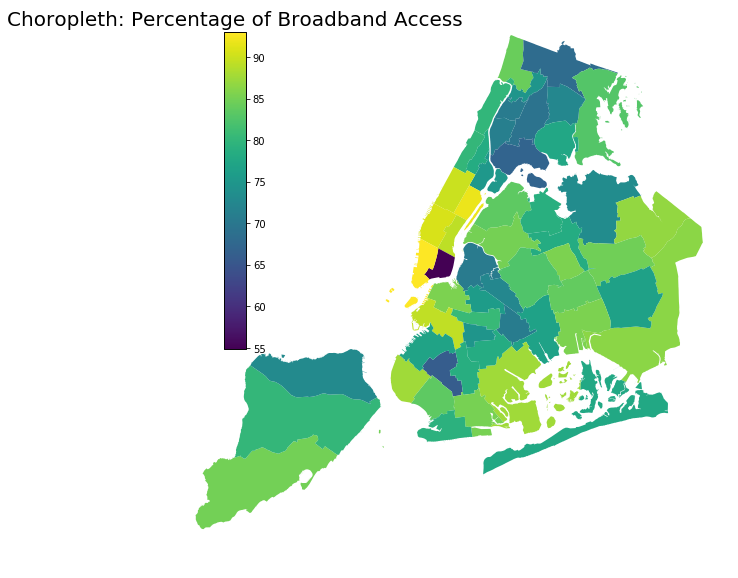

In [25]:
#choropleth of the percentage of internet acess
cp.choroplethNYC(pumashp, column='percent_BB', lw=2);
plt.title('Choropleth: Percentage of Broadband Access', fontsize=20)


**Figure 2:** This map show the percentage of households that have broadband internet in each PUMA of NYC. The lighter colors show areas that have the highest percentages. The light areas of Manhattan make sense with what we know to be the socioeconomic background of that area. There is one outlier in the south eastern corner of Manhattan. It seems unusual that this area would have such a low percentage; further investigation is needed. 

## 4. LinkNYC: assess whether the locations of the linkNYC stations are supplying internet where it is needed.

acquire the linkNYC locations and prepare them into a dataframe
read it in from the HW9_fb55 folder in :
https://github.com/fedhere/PUI2017_fb55

Notice that you can also get a linkNYC locations shapefile from NYC open data, as I did to generate this, but I want you do to do some extra coordinates gymnastics for practice so use the one I provide.

In [26]:
linkNYC = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW9_fb55/linkNYClocations.csv')

In [27]:
(linkNYC.longitude).astype(float)
(linkNYC.latitude).astype(float)
linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133


### combine long lat column  to greate a "geometry" column for the dataframe, then convert the dataframe into a GeoDataFrame _linkNYC_ and set native coordinates frame to lat/lon

In [28]:
# combine lat and lon to one column
linkNYC['lonlat'] = zip(linkNYC['longitude'], linkNYC['latitude'])

# create a point geometry for lat long column
linkNYC['geometry'] = linkNYC[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

# convert back into a geodataframe
geometry = linkNYC.geometry
crs = {'init': 'epsg:4326'}
linkNYC = GeoDataFrame(linkNYC, crs=crs, geometry=geometry)

# let's see what we're working with 
linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude,lonlat,geometry
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938)
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439)
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


In [29]:
linkNYC.crs

{'init': 'epsg:4326'}

### plot the location of the linkNYC stations on top of a choropleth of broadband access percentage in *5 equal intervals*

In [30]:
# convert to same projection
pumashp = pumashp.to_crs(epsg=4326)

In [31]:
# check that they're the same
print linkNYC.crs
print pumashp.crs

{'init': 'epsg:4326'}
{'init': 'epsg:4326', 'no_defs': True}


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


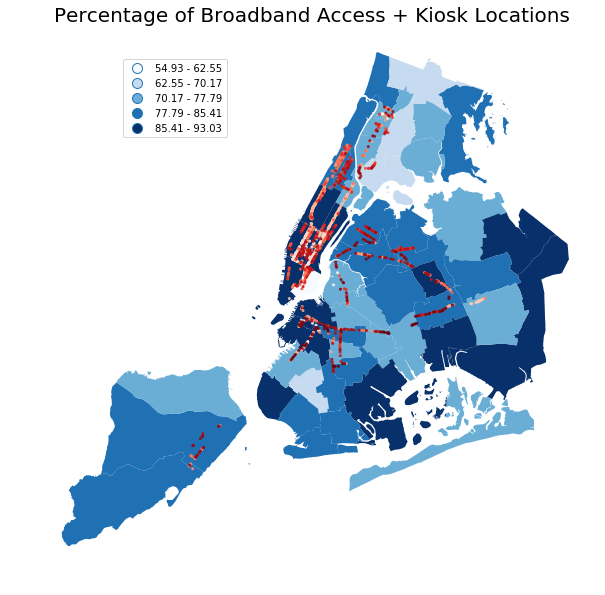

In [32]:
# source: https://github.com/fedhere/PUI2017_fb55/blob/master/HW9_fb55/pandasGeospatialABC.ipynb

# plotting the basemap
fig, ax, cb = cp.choroplethNYC(pumashp, column='percent_BB', cmap='Blues', scheme="Equal_interval", k=5, lw=1, cb=True);

# plotting the linknyc kiosks
linkNYC.plot(ax=ax, cmap='Reds', markersize=4, alpha=.8, k=5)

plt.title('Percentage of Broadband Access + Kiosk Locations ', fontsize=20)




**Figure 3:** This map classifies shows the percentage of broadband by PUMA in the five boroughs of New York City. On top of the PUMAs, red dots show the location of LinkNYC booths. You'll notice that the LinkNYC kiosks don't stretch into the areas with the least amount of broadband, and are most dense in some of the areas with the most broadband.

## 5 Find the number of linkNYC locations per person by PUMA

### 5.1 with the AFF API from ACS get the total population by puma and merge it into your GeoDF

In [33]:
keyPop = 'B00001_001E'
aff1y['variables'][keyPop]

{u'attributes': u'B00001_001EA',
 u'concept': u'UNWEIGHTED SAMPLE COUNT OF THE POPULATION',
 u'group': u'B00001',
 u'label': u'Estimate!!Total',
 u'limit': 0,
 u'predicateType': u'int',
 u'validValues': []}

In [34]:



# pulling in total population 
urlpop = "https://api.census.gov/data/2016/acs/acs1?get=" + keyPop +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
respPop = requests.request('GET', urlpop).content
pumaPop = pd.read_csv(io.StringIO(respPop.decode('utf-8').replace('[','').replace(']','')))
pumaPop['PUMA'] = pumaPop['public use microdata area'].astype(int)
pumaPop.head()

,B00001_001E,NAME,state,public use microdata area,Unnamed: 4,PUMA
0,3075,"St. Lawrence County PUMA, New York",36,100,NaN,100
1,4356,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,200
2,2736,"Warren & Washington Counties PUMA, New York",36,300,NaN,300
3,2722,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,401
4,2874,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,402


### 5.2 find the number of stations per 100 people per PUMA

In [35]:
# # merging population into gdf
pumashp = pd.merge(pumashp, pumaPop, on='PUMA')
# creating a column dividing by 100
pumashp['per100'] = pumashp['B00001_001E'] / 100
pumashp.head(2)

,shape_area,shape_leng,puma,geometry,PUMA,B28002_001E,NAME_x,state_x,public use microdata area_x,Unnamed: 4_x,...,NAME_y,state_y,Unnamed: 4_y,percent_BB,B00001_001E,NAME,state,public use microdata area_y,Unnamed: 4,per100
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...,3701,42158,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,...,"NYC-Bronx Community District 8--Riverdale, Fie...",36,NaN,84.275820,1517,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,15.17
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...,3702,49817,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN,...,"NYC-Bronx Community District 12--Wakefield, Wi...",36,NaN,68.310015,1959,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN,19.59


In [36]:
# converting to correct epsg for sjoin
pumashp = pumashp.to_crs(epsg=2263)
linkNYC = linkNYC.to_crs(epsg=2263)

In [37]:
# finally the sjoin!
puma_link = gp.sjoin(pumashp, linkNYC)
puma_link.shape

(1414, 28)

In [38]:
# cleaning it up
puma_link = puma_link.drop(['state_x', 'Unnamed: 4_x', 'NAME_y', 'Unnamed: 4_y', 'state', 'Unnamed: 0', 'NAME_x', 'state_y', 'NAME', 'Unnamed: 4', 'index_right'], inplace=False, axis=1)

In [39]:
print puma_link.columns
puma_link.head(3)

Index([                 u'shape_area',                  u'shape_leng',
                              u'puma',                    u'geometry',
                              u'PUMA',                 u'B28002_001E',
       u'public use microdata area_x',                 u'B28002_004E',
                        u'percent_BB',                 u'B00001_001E',
       u'public use microdata area_y',                      u'per100',
                         u'link_site',                   u'longitude',
                        u'date_link_',                    u'latitude',
                            u'lonlat'],
      dtype='object')


,shape_area,shape_leng,puma,geometry,PUMA,B28002_001E,public use microdata area_x,B28002_004E,percent_BB,B00001_001E,public use microdata area_y,per100,link_site,longitude,date_link_,latitude,lonlat
0,9.792852e+07,53227.144357,3701,"POLYGON ((1012885.033996583 268830.4841918442,...",3701,42158,3701,35529,84.275820,1517,3701,15.17,bx-08-145850,-73.902101,2017-06-10,40.868698,"(-73.9021009, 40.86869849)"
4,1.224950e+08,68630.512052,3705,"POLYGON ((1015377.269592287 238959.501403747, ...",3705,58706,3705,40757,69.425612,2011,3705,20.11,bx-06-118922,-73.898221,2017-10-20,40.846926,"(-73.898220556, 40.8469261747)"
5,4.388687e+07,51799.404760,3706,"POLYGON ((1018060.325195312 261167.655395456, ...",3706,46018,3706,34391,74.733800,1274,3706,12.74,bx-05-119659,-73.893343,2016-12-06,40.860027,"(-73.893343, 40.860027)"


In [40]:
# gorup by count per puma, and reset index
linkCount = puma_link.groupby('PUMA')[['link_site']].count()
linkCount.reset_index(level=0, inplace=True)
linkCount.head()

,PUMA,link_site
0,3701,1
1,3705,1
2,3706,20
3,3707,29
4,3708,19


In [41]:
# merging back with shape
pumashplc = pd.merge(pumashp, linkCount, on='PUMA', how='outer')
pumashplc.head(1)

,shape_area,shape_leng,puma,geometry,PUMA,B28002_001E,NAME_x,state_x,public use microdata area_x,Unnamed: 4_x,...,state_y,Unnamed: 4_y,percent_BB,B00001_001E,NAME,state,public use microdata area_y,Unnamed: 4,per100,link_site
0,9.792852e+07,53227.144357,3701,"POLYGON ((1012885.033996583 268830.4841918442,...",3701,42158,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,...,36,NaN,84.27582,1517,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,15.17,1.0


In [42]:
pumashplc['link100'] = pumashplc['link_site']/ pumashplc['per100']
pumashplc.link100.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    37.000000
mean      2.327677
std       3.328955
min       0.049727
25%            NaN
50%            NaN
75%            NaN
max      15.141540
Name: link100, dtype: float64

### Plot the linkNYC locations on top of a choropleth of number of stations per 100 people  in 10 equal intervals


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


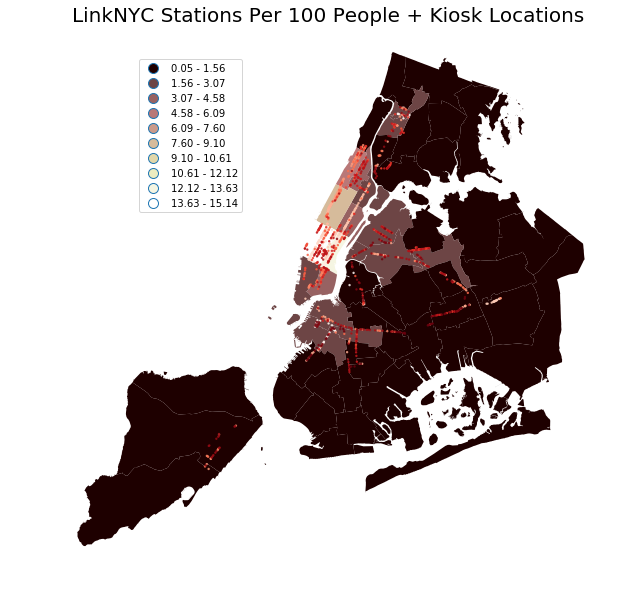

In [43]:
# plotting the basemap
fig, ax, cb = cp.choroplethNYC(pumashplc, column='link100', cmap='pink', scheme="Equal_interval", k=10, lw=1, cb=True);

# plotting the linknyc kiosks
linkNYC.plot(ax=ax, cmap='Reds', markersize=2, alpha=.75)
plt.title('LinkNYC Stations Per 100 People + Kiosk Locations ', fontsize=20)


**Figure 4:** This shows locations of each linkNYC kiosk on a choropleth of the number of stations for every group of 100 people. It shows that the most kiosks are in areas that already have some form of broadband internet, and most of New York City is dark, with no kiosks.

### Extra credit 1: 
How would you enhance the visibility of this map? you are working with numbers that are mostly very low, and reside near each other, and them have a few much higher value points. Notice that here the high values are interesting though and should not be thrown away!

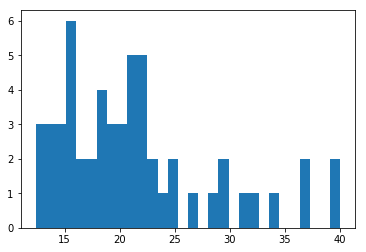

In [44]:
# investigating distribution of kiosks per 100 people
pl.hist(pumashplc["per100"], bins=30);

To enhance visibility, I'd do serveral things (beyond doing this in ArcMap instead!). Things to explore include: 
- look at each borough in isolation
- create more buckets of identification with geopandas map
- increase fig size for visibility
- modify markersize and other built in functions

### Grade: 9/10 - error when referencing pumashp.PUMA